In [11]:
import pandas as pd

df = pd.read_csv("/content/sPORTS_news_dataset.csv")
df.head(10)


,text,label
0,The football team won the final match of the t...,0
1,The cricket players trained hard for the upcom...,0
2,The coach praised the team performance after t...,0
3,The basketball match ended with a thrilling la...,0
4,The striker scored two goals in the league match,0
5,The tennis champion won the grand slam title,0
6,The football league season starts next week,0
7,The team celebrated their championship victory,0
8,The player signed a new contract with the club,0
9,The match was postponed due to heavy rain,0


In [12]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

nltk.download('stopwords')

stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()

def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    words = text.split()
    words = [stemmer.stem(word) for word in words if word not in stop_words]
    return " ".join(words)

df["clean_text"] = df["text"].apply(clean_text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df["clean_text"])
y = df["label"]


In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [16]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train, y_train)


MultinomialNB()

In [18]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nClassification Report:\n")
print(classification_report(y_test, y_pred, target_names=["Sports", "Politics"]))


Accuracy: 1.0

Classification Report:

              precision    recall  f1-score   support

      Sports       1.00      1.00      1.00        12
    Politics       1.00      1.00      1.00         8

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



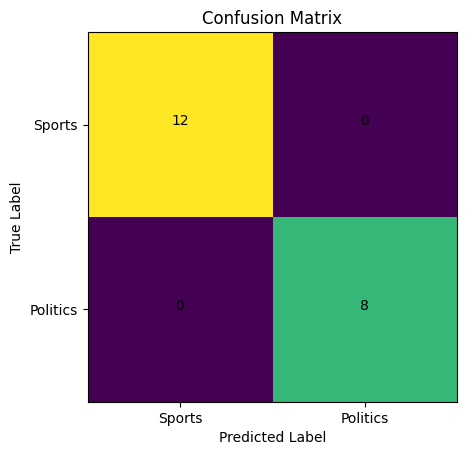

In [19]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure()
plt.imshow(cm)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.xticks([0, 1], ["Sports", "Politics"])
plt.yticks([0, 1], ["Sports", "Politics"])

for i in range(2):
    for j in range(2):
        plt.text(j, i, cm[i, j], ha="center")

plt.show()


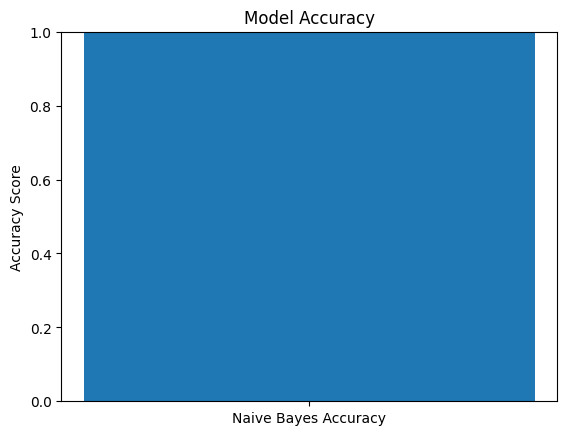

In [20]:
plt.figure()
plt.bar(["Naive Bayes Accuracy"], [accuracy])
plt.ylim(0, 1)
plt.title("Model Accuracy")
plt.ylabel("Accuracy Score")
plt.show()
